In [3]:
import numpy as np
import scipy.io as sio

In [4]:
mat = sio.loadmat('dataset.mat')
data = mat['X']
target = mat['D']

(a) Directly compute the least square (Wiener) solution with the provided data.

In [5]:
# the optimal weight
W_star = np.linalg.inv(data.T @ data) @ data.T @ target
print("Optimal Weight W*:\n", W_star)

# predictions using W*
predictions = data @ W_star
mse = np.mean((target - predictions) ** 2)
print("Mean Squared Error:", mse)

Optimal Weight W*:
 [[ 1.0006781 ]
 [ 1.00061145]
 [-2.00031968]]
Mean Squared Error: 0.00010079903131736677


(b) Train with 1 pair of data points and target each time.

In [6]:
lr = 0.005 #initialize learning rate
epochs = 20 #initiatize epochs
W = np.array([0.53,0.20,0.10]).reshape(-1,1) #initialize weights

mse_list = []

# Run LMS for 20 epochs
for epoch in range(epochs):
    for i in range(data.shape[0]): 
        X_i = data[i].reshape(3, 1)
        d_i = target[i]
        
        error = d_i - X_i.T @ W
        
        W = W + lr * error * X_i
    
    # Compute MSE for the whole dataset
    predictions = data @ W
    mse = np.mean((target - predictions) ** 2)
    mse_list.append(mse)
    
# Report the final weight
print("The final weight is:\n", W)

The final weight is:
 [[ 1.00070598]
 [ 1.00059491]
 [-2.00033694]]


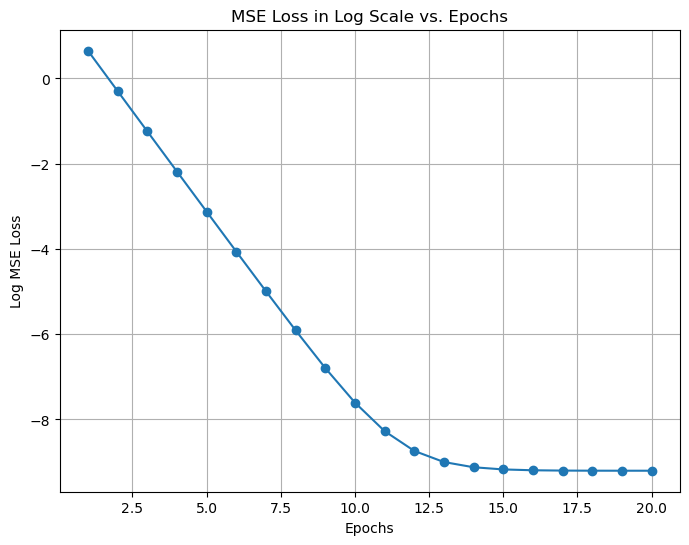

In [7]:
# Plot the MSE loss in log scale vs Epochs
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(range(1, epochs+1), np.log(mse_list), marker='o')
plt.title("MSE Loss in Log Scale vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Log MSE Loss")
plt.grid(True)
plt.show()



(c) Observe if the linear models fit the data well

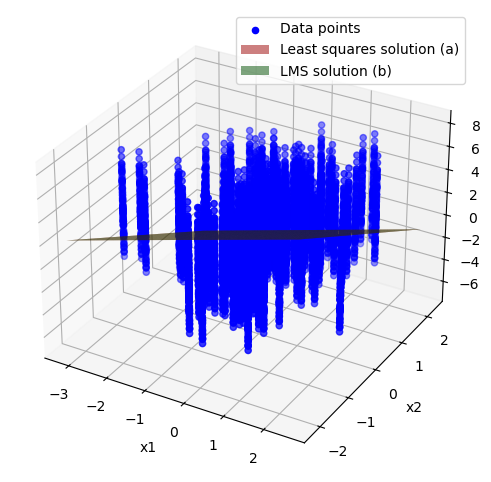

In [8]:
from mpl_toolkits.mplot3d import Axes3D

# 3D scatter plot of (x1, x2, d)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 1], data[:, 2], target, c='blue', marker='o', label='Data points')

# Plot the linear model from part (a) (W_star from least squares solution)
x1_range = np.linspace(min(data[:, 1]), max(data[:, 1]), 100)
x2_range = np.linspace(min(data[:, 2]), max(data[:, 2]), 100)
X1, X2 = np.meshgrid(x1_range, x2_range)
Y_a = W_star[0] + W_star[1] * X1 + W_star[2] * X2
ax.plot_surface(X1, X2, Y_a, color='red', alpha=0.5, label='Least squares solution (a)')

# Plot the linear model from part (b) (W from LMS)
Y_b = W[0] + W[1] * X1 + W[2] * X2
ax.plot_surface(X1, X2, Y_b, color='green', alpha=0.5, label='LMS solution (b)')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('d')
plt.legend()
plt.show()

(d) Explore learning rate

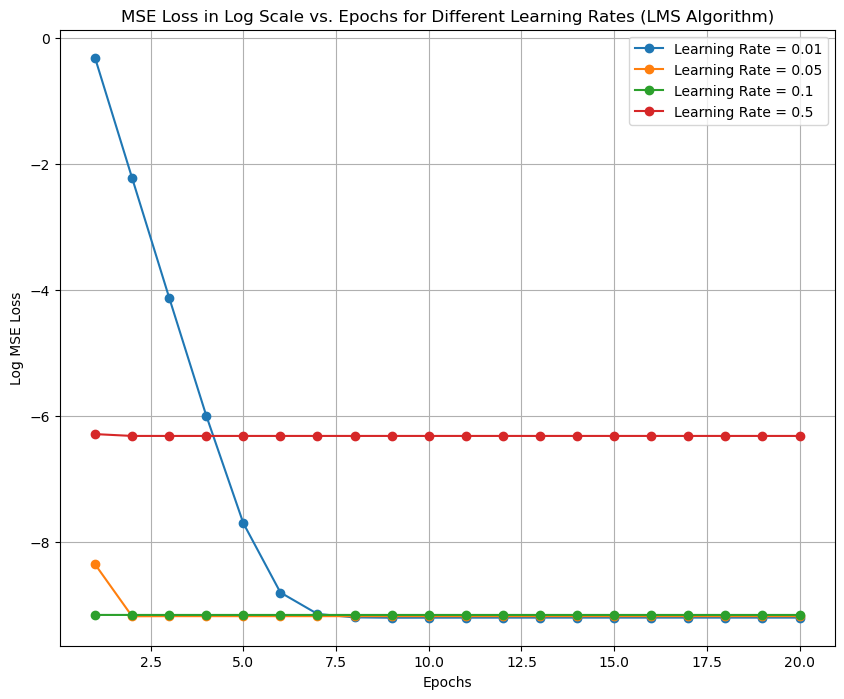

In [9]:
# Initialize learning rates and other parameters
learning_rates = [0.01, 0.05, 0.1, 0.5]
epochs = 20
mse_dict = {}

# Loop through each learning rate
for r in learning_rates:
    W = np.array([0.53,0.20,0.10]).reshape(-1,1) 
    mse_list = []  # List to store MSE for each epoch
    
    # Perform LMS for 20 epochs
    for epoch in range(epochs):
        for i in range(data.shape[0]):  # Loop through each data point
            X_i = data[i].reshape(3, 1)
            d_i = target[i]

            # Compute the error (d_k - X_k^T W^k)
            error = d_i - X_i.T @ W

            # Update the weights
            W = W + r * error * X_i

        # Compute MSE for the whole dataset
        predictions = data @ W
        mse = np.mean((target - predictions) ** 2)
        mse_list.append(mse)
    
    mse_dict[r] = mse_list  # Store MSE list for this learning rate

# Plot MSE losses for all learning rates on log scale
plt.figure(figsize=(10, 8))

for r in learning_rates:
    plt.plot(range(1, epochs+1), np.log(mse_dict[r]), marker='o', label=f'Learning Rate = {r}')

plt.title("MSE Loss in Log Scale vs. Epochs for Different Learning Rates (LMS Algorithm)")
plt.xlabel("Epochs")
plt.ylabel("Log MSE Loss")
plt.legend()
plt.grid(True)
plt.show()